In [1]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
workers = 0 if os.name == 'nt' else 4

In [2]:
!nvidia-smi

Thu Dec 10 09:29:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:06.0 Off |                  Off |
| N/A   33C    P0    49W / 300W |   1420MiB / 16160MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [4]:

mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

In [5]:
help(MTCNN)

Help on class MTCNN in module facenet_pytorch.models.mtcnn:

class MTCNN(torch.nn.modules.module.Module)
 |  MTCNN(image_size=160, margin=0, min_face_size=20, thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True, select_largest=True, selection_method=None, keep_all=False, device=None)
 |  
 |  MTCNN face detection module.
 |  
 |  This class loads pretrained P-, R-, and O-nets and returns images cropped to include the face
 |  only, given raw input images of one of the following types:
 |      - PIL image or list of PIL images
 |      - numpy.ndarray (uint8) representing either a single image (3D) or a batch of images (4D).
 |  Cropped faces can optionally be saved to file
 |  also.
 |  
 |  Keyword Arguments:
 |      image_size {int} -- Output image size in pixels. The image will be square. (default: {160})
 |      margin {int} -- Margin to add to bounding box, in terms of pixels in the final image. 
 |          Note that the application of the margin differs slightly from the 

In [6]:
help(InceptionResnetV1)

Help on class InceptionResnetV1 in module facenet_pytorch.models.inception_resnet_v1:

class InceptionResnetV1(torch.nn.modules.module.Module)
 |  InceptionResnetV1(pretrained=None, classify=False, num_classes=None, dropout_prob=0.6, device=None)
 |  
 |  Inception Resnet V1 model with optional loading of pretrained weights.
 |  
 |  Model parameters can be loaded based on pretraining on the VGGFace2 or CASIA-Webface
 |  datasets. Pretrained state_dicts are automatically downloaded on model instantiation if
 |  requested and cached in the torch cache. Subsequent instantiations use the cache rather than
 |  redownloading.
 |  
 |  Keyword Arguments:
 |      pretrained {str} -- Optional pretraining dataset. Either 'vggface2' or 'casia-webface'.
 |          (default: {None})
 |      classify {bool} -- Whether the model should output classification probabilities or feature
 |          embeddings. (default: {False})
 |      num_classes {int} -- Number of output classes. If 'pretrained' is s

In [7]:
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [8]:
from facenet_pytorch.models.mtcnn import fixed_image_standardization

In [9]:
from torchvision import transforms

In [12]:
# tr = transforms.Compose([
#     transforms.Resize(256),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,0.5,0.5),(1,1,1))
# ]
# )

In [13]:
tr_raw =  transforms.Compose([
    transforms.Resize(256),
]
)

In [14]:
!ls Faces/Faces

Biden  Eltsin  Ibatulin  Knigthley  navalny  Portman


In [15]:
face_folder = datasets.ImageFolder(root='Faces/Faces', transform=tr_raw)

In [16]:
len(face_folder)

18

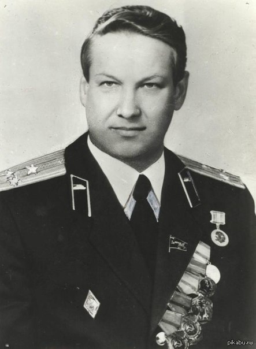

In [21]:
face_folder[3][0]

In [22]:
import PIL.Image

In [23]:
from torchvision.utils import make_grid

In [24]:
face_folder[0]

(<PIL.Image.Image image mode=RGB size=256x315 at 0x7FFA23109FD0>, 0)

In [25]:
# faces = [mtcnn(im) for im in images]
classes = []
faces = []
for i in range(len(face_folder)):
    X,y = face_folder[i]
    classes.append(y)
    faces.append(mtcnn(X))

In [30]:
faces[5]

tensor([[[ 0.5195,  0.3320,  0.0977,  ..., -0.9961, -0.9961, -0.9961],
         [ 0.5195,  0.3477,  0.1211,  ..., -0.9961, -0.9961, -0.9961],
         [ 0.5273,  0.3711,  0.1602,  ..., -0.9961, -0.9883, -0.9883],
         ...,
         [ 0.8789,  0.8789,  0.8867,  ..., -0.6602, -0.7617, -0.8242],
         [ 0.8711,  0.8789,  0.8867,  ..., -0.7617, -0.8398, -0.8867],
         [ 0.8711,  0.8711,  0.8789,  ..., -0.8398, -0.8945, -0.9336]],

        [[ 0.5117,  0.3164,  0.0742,  ..., -0.9883, -0.9883, -0.9883],
         [ 0.5117,  0.3320,  0.0977,  ..., -0.9961, -0.9961, -0.9961],
         [ 0.5195,  0.3555,  0.1367,  ..., -0.9961, -0.9883, -0.9883],
         ...,
         [ 0.8164,  0.8164,  0.8242,  ..., -0.6992, -0.8008, -0.8711],
         [ 0.8086,  0.8164,  0.8242,  ..., -0.8086, -0.8711, -0.9258],
         [ 0.8086,  0.8086,  0.8164,  ..., -0.8789, -0.9258, -0.9570]],

        [[ 0.4805,  0.2930,  0.0508,  ..., -0.9961, -0.9961, -0.9961],
         [ 0.4805,  0.3086,  0.0742,  ..., -0

In [31]:
with torch.no_grad():
    dt_embeddings = resnet(torch.stack(faces))

In [32]:
dt_embeddings.size()

torch.Size([18, 512])

In [33]:
from sklearn import metrics

In [34]:
euc = metrics.pairwise.euclidean_distances(dt_embeddings.numpy())

In [35]:
import pandas as pd

In [36]:
classes

[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5]

In [37]:
face_folder.classes

['Biden', 'Eltsin', 'Ibatulin', 'Knigthley', 'Portman', 'navalny']

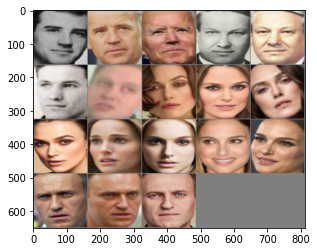

In [39]:
grid = make_grid(faces,nrow=5)
plt.imshow(grid.permute(1,2,0).numpy() / 2 + 0.5)

In [46]:
euc_df = pd.DataFrame(euc, 
             columns=[face_folder.classes[c] + f'{i}' for i, c in enumerate(classes)],
             index=[face_folder.classes[c] + f'{i}' for i, c in enumerate(classes)])

In [47]:
euc_df

,Biden0,Biden1,Biden2,Eltsin3,Eltsin4,Eltsin5,Ibatulin6,Knigthley7,Knigthley8,Knigthley9,Knigthley10,Portman11,Portman12,Portman13,Portman14,navalny15,navalny16,navalny17
Biden0,0.000000,0.818135,0.854728,1.395409,1.421083,1.416709,1.475619,1.578445,1.554737,1.594932,1.508523,1.269886,1.579674,1.482602,1.423907,1.486160,1.505851,1.504811
Biden1,0.818135,0.000000,0.924453,1.499226,1.455529,1.482761,1.489797,1.640247,1.529646,1.599528,1.518754,1.291879,1.463307,1.414238,1.437055,1.351246,1.359124,1.338910
Biden2,0.854728,0.924453,0.000000,1.451503,1.363726,1.411385,1.500516,1.663920,1.555391,1.622543,1.514700,1.400311,1.568217,1.530829,1.514457,1.475381,1.414337,1.481313
Eltsin3,1.395409,1.499226,1.451503,0.000000,0.942345,1.137126,1.120403,1.412977,1.462233,1.492834,1.434147,1.374565,1.334035,1.315104,1.237774,1.301605,1.289008,1.270672
Eltsin4,1.421083,1.455529,1.363726,0.942345,0.000000,1.072529,1.134941,1.482954,1.501128,1.577106,1.521969,1.438100,1.414573,1.438501,1.379168,1.358210,1.283885,1.286618
Eltsin5,1.416709,1.482761,1.411385,1.137126,1.072529,0.000000,1.348891,1.387046,1.493618,1.451741,1.435837,1.396807,1.499988,1.454677,1.376016,1.280681,1.304728,1.220664
Ibatulin6,1.475619,1.489797,1.500516,1.120403,1.134941,1.348891,0.000000,1.353284,1.406169,1.381508,1.463294,1.458054,1.312430,1.330316,1.397208,1.249285,1.143461,1.283512
Knigthley7,1.578445,1.640247,1.663920,1.412977,1.482954,1.387046,1.353284,0.000000,0.949115,0.619691,0.909695,1.231758,1.171510,1.153572,1.092852,1.301596,1.290845,1.321423
Knigthley8,1.554737,1.529646,1.555391,1.462233,1.501128,1.493618,1.406169,0.949115,0.000000,0.837943,0.696021,1.107124,1.123657,1.077348,1.038899,1.434429,1.344812,1.396055
Knigthley9,1.594932,1.599528,1.622543,1.492834,1.577106,1.451741,1.381508,0.619691,0.837943,0.000000,0.851821,1.061676,1.110012,1.039082,0.964351,1.333469,1.319176,1.336598


In [43]:
import plotly.express as px

In [48]:
px.imshow(euc_df)

In [49]:
px.imshow(euc_df > 1)